In [6]:
import math

Load some sample data to test our functions

In [10]:
x_train=[1.0, 2.0, 3.0]
y_train=[300,500,680]

Formula to compute cost is 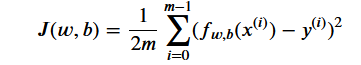


Also 𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏

So we need to compute the values of the variables w and b

In [3]:
# function to compute cost
def compute_cost(x,y,w,b):
    m = len(x)
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

x = [10, 20, 30, 40]
y = [100, 200, 300, 400]
w = 2
b = 2
compute_cost(x, y, w, b)

23602.0

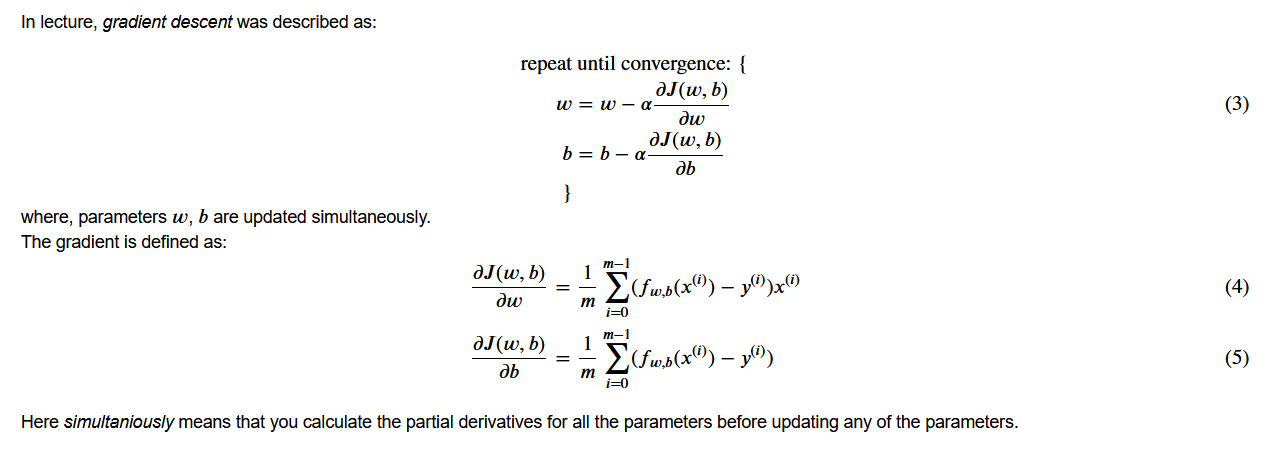

In [4]:
#function to compute gradient descent

def compute_gradient(x,y,w,b):
  m=len(x)
  dj_dw = 0
  dj_db = 0

  for i in range(m):
      f_wb = w * x[i] + b
      dj_dw_i = (f_wb - y[i]) * x[i]
      dj_db_i = f_wb - y[i]
      dj_db += dj_db_i
      dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

x = [10, 20, 30, 40]
y = [100, 200, 300, 400]
w = 2
b = 2
compute_gradient(x, y, w, b)

(-5950.0, -198.0)

In [8]:
#function to obtain optimal values of w and b
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history


In [12]:
#calling the functions defined to obtain final values of w and b
#lets initialise w and b to 0 and the learning rate alpha to 0.01
w_init=0
b_init=0
alpha=0.01
#lets run the model for 10000 iterations
iters=10000
w_final, b_final, J_hist, p_hist= gradient_descent(x_train, y_train, w_init, b_init, alpha, iters, compute_cost, compute_gradient)


Iteration    0: Cost 1.19e+05  dj_dw: -1.113e+03, dj_db: -4.933e+02   w:  1.113e+01, b: 4.93333e+00
Iteration 1000: Cost 1.51e+01  dj_dw:  3.959e-01, dj_db: -9.000e-01   w:  1.933e+02, b: 1.05854e+02
Iteration 2000: Cost 1.15e+01  dj_dw:  1.189e-01, dj_db: -2.704e-01   w:  1.910e+02, b: 1.11087e+02
Iteration 3000: Cost 1.11e+01  dj_dw:  3.573e-02, dj_db: -8.121e-02   w:  1.903e+02, b: 1.12658e+02
Iteration 4000: Cost 1.11e+01  dj_dw:  1.073e-02, dj_db: -2.439e-02   w:  1.901e+02, b: 1.13131e+02
Iteration 5000: Cost 1.11e+01  dj_dw:  3.224e-03, dj_db: -7.328e-03   w:  1.900e+02, b: 1.13272e+02
Iteration 6000: Cost 1.11e+01  dj_dw:  9.683e-04, dj_db: -2.201e-03   w:  1.900e+02, b: 1.13315e+02
Iteration 7000: Cost 1.11e+01  dj_dw:  2.909e-04, dj_db: -6.612e-04   w:  1.900e+02, b: 1.13328e+02
Iteration 8000: Cost 1.11e+01  dj_dw:  8.737e-05, dj_db: -1.986e-04   w:  1.900e+02, b: 1.13332e+02
Iteration 9000: Cost 1.11e+01  dj_dw:  2.625e-05, dj_db: -5.966e-05   w:  1.900e+02, b: 1.13333e+02


In [7]:
print(f"the final values for w and b are {w_final} and  {b_final}")

the final values for w and b are 190.00006558949732 and  113.333184232989


In [8]:
#based on the values obtained for w and b we can predict y if we are given the input x
x=1.5
print("Output=",w_final*x+b_final)

Output= 398.333282617235
